In [ ]:
from google.colab import drive
import zipfile, os

# 1. Mount your Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 2. Path to your folders in Drive
# Make sure this folder contains "cats" and "dogs" subfolders
data_dir = "/content/drive/MyDrive/catsdogs_data/PetImages"



In [ ]:
import os, shutil
from pathlib import Path
from google.colab import drive

# 2️⃣ Source: your existing dataset in Drive
data_dir = Path("/content/drive/MyDrive/catsdogs_data/PetImages")
cats_dir = data_dir / "Cat"
dogs_dir = data_dir / "Dog"

# 3️⃣ Destination: "model 1" dataset folder in Drive
base_dir = Path("/content/drive/MyDrive/catsdogs_data/model 1")

# Create base folders if not exist
for subset in ("train", "validation", "test"):
    for category in ("cats", "dogs"):
        os.makedirs(base_dir / subset / category, exist_ok=True)

print("✅ Folder structure created under:", base_dir)

# 4️⃣ Helper function to copy files safely
def copy_images(src_dir, dst_dir, start_idx, end_idx):
    """Copy images from source to destination based on filename index range."""
    fnames = [f"{i}.jpg" for i in range(start_idx, end_idx)]
    for fname in fnames:
        src = src_dir / fname
        dst = dst_dir / fname
        if src.exists():
            shutil.copyfile(src, dst)
        else:
            pass  # skip if file doesn't exist (some Cat/Dog images may be corrupted or missing)

# 5️⃣ Split definition
# Train: 500 cats + 500 dogs
# Validation: 250 cats + 250 dogs
# Test: 250 cats + 250 dogs

# --- Training ---
copy_images(cats_dir, base_dir / "train" / "cats", 0, 500)
copy_images(dogs_dir, base_dir / "train" / "dogs", 0, 500)

# --- Validation ---
copy_images(cats_dir, base_dir / "validation" / "cats", 500, 750)
copy_images(dogs_dir, base_dir / "validation" / "dogs", 500, 750)

# --- Test ---
copy_images(cats_dir, base_dir / "test" / "cats", 750, 1000)
copy_images(dogs_dir, base_dir / "test" / "dogs", 750, 1000)

print("✅ Finished creating 'model 1' dataset!")

# 6️⃣ Optional: verify structure
!find "/content/drive/MyDrive/catsdogs_data/model 1" -maxdepth 3 -type d -print


✅ Folder structure created under: /content/drive/MyDrive/catsdogs_data/model 1
✅ Finished creating 'model 1' dataset!
/content/drive/MyDrive/catsdogs_data/model 1
/content/drive/MyDrive/catsdogs_data/model 1/train
/content/drive/MyDrive/catsdogs_data/model 1/train/cats
/content/drive/MyDrive/catsdogs_data/model 1/train/dogs
/content/drive/MyDrive/catsdogs_data/model 1/validation
/content/drive/MyDrive/catsdogs_data/model 1/validation/cats
/content/drive/MyDrive/catsdogs_data/model 1/validation/dogs
/content/drive/MyDrive/catsdogs_data/model 1/test
/content/drive/MyDrive/catsdogs_data/model 1/test/cats
/content/drive/MyDrive/catsdogs_data/model 1/test/dogs


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

base = "/content/drive/MyDrive/catsdogs_data/model 1"

train_dataset = image_dataset_from_directory(
    base + "/train", image_size=(180,180), batch_size=32)
validation_dataset = image_dataset_from_directory(
    base + "/validation", image_size=(180,180), batch_size=32)
test_dataset = image_dataset_from_directory(
    base + "/test", image_size=(180,180), batch_size=32)

# Skip records that error during the pipeline (TF 2.10+)
train_dataset = train_dataset.ignore_errors()
validation_dataset = validation_dataset.ignore_errors()
test_dataset = test_dataset.ignore_errors()

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(AUTOTUNE)


Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow import keras

# Model checkpoint callback (save best model based on val_loss)
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",  # or .h5 if TF < 2.11
        save_best_only=True,
        monitor="val_loss"
    )
]

# Train model
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks
)


Epoch 1/30
     32/Unknown 13s 178ms/step - accuracy: 0.5218 - loss: 1.0366

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 293ms/step - accuracy: 0.5212 - loss: 1.0304 - val_accuracy: 0.5043 - val_loss: 0.6930
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5027 - loss: 0.6931 - val_accuracy: 0.5043 - val_loss: 0.6927
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.5033 - loss: 0.6940 - val_accuracy: 0.5043 - val_loss: 0.6928
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5155 - loss: 0.6940 - val_accuracy: 0.5043 - val_loss: 0.6908
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5506 - loss: 0.6962 - val_accuracy: 0.5171 - val_loss: 0.6909
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5628 - loss: 0.6881 - val_accuracy: 0.5171 - val_loss: 0.6869
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5877 - loss: 0.6897 - val_accuracy: 0.5470 - val_loss: 0.6804
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.6433 - loss: 0.6508 - val_accuracy: 0.5641 - val_loss: 

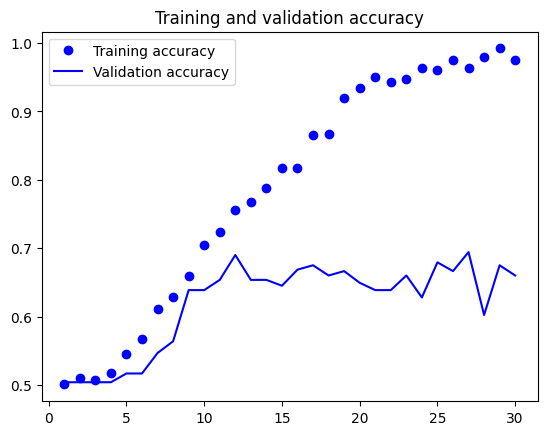

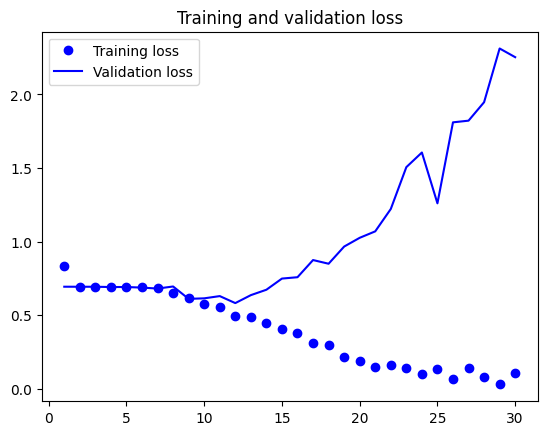

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.6717 - loss: 0.6091
Test accuracy: 0.682
Test loss: 0.609


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7162 - loss: 0.5594
Validation accuracy: 0.690
Validation loss: 0.582


**Data Augmentation**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

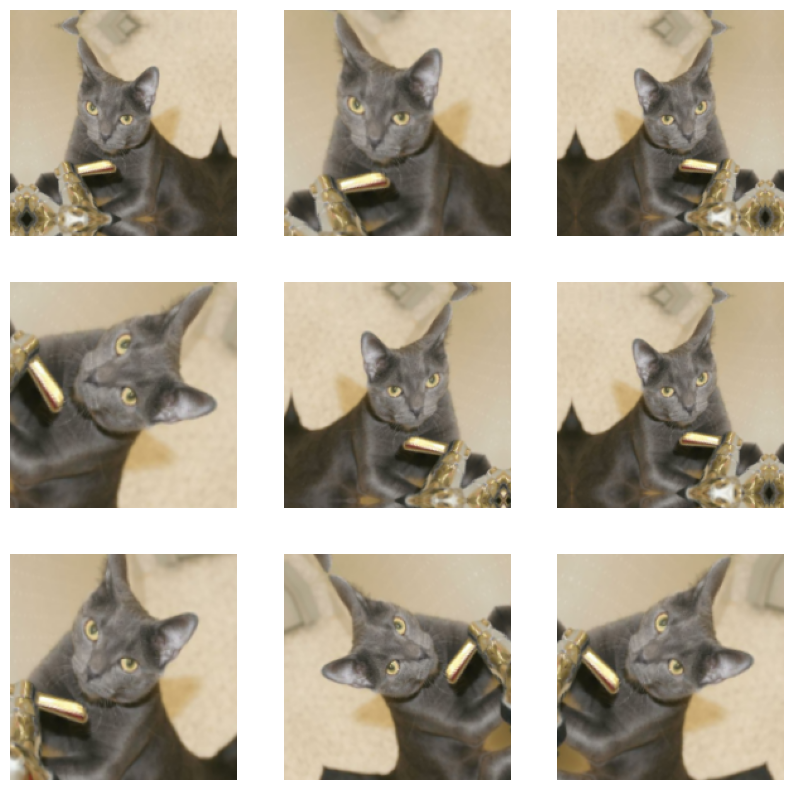

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")


In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.5264 - loss: 0.8507 - val_accuracy: 0.5043 - val_loss: 0.6947
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.4951 - loss: 0.6968 - val_accuracy: 0.5043 - val_loss: 0.6942
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.5002 - loss: 0.6957 - val_accuracy: 0.5043 - val_loss: 0.6939
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.4810 - loss: 0.6943 - val_accuracy: 0.5043 - val_loss: 0.6935
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5061 - loss: 0.6943 - val_accuracy: 0.5043 - val_loss: 0.6914
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5227 - loss: 0.6937 - val_accuracy: 0.5748 - val_loss: 0.6892
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5411 - loss: 0.6879 - val_accuracy: 0.5363 - val_loss: 0.6855
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.5515 - loss: 0.6846 - val_accuracy: 0.5769 - v

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7264 - loss: 0.5582
Test accuracy: 0.732
Test loss: 0.567


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7478 - loss: 0.5552
Validation accuracy: 0.726
Validation loss: 0.571


## **MODEL 2**

In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

BASE = "/content/drive/MyDrive/catsdogs_data/model 2"
IMG_SIZE = (180, 180)
BATCH = 32
SEED = 123

train_dataset = image_dataset_from_directory(
    BASE + "/train", image_size=IMG_SIZE, batch_size=BATCH, shuffle=True, seed=SEED)
validation_dataset = image_dataset_from_directory(
    BASE + "/validation", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)
test_dataset = image_dataset_from_directory(
    BASE + "/test", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)

# Skip any stragglers instead of crashing
try:
    train_dataset = train_dataset.ignore_errors()
    validation_dataset = validation_dataset.ignore_errors()
    test_dataset = test_dataset.ignore_errors()
except AttributeError:
    train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
    validation_dataset = validation_dataset.apply(tf.data.experimental.ignore_errors())
    test_dataset = test_dataset.apply(tf.data.experimental.ignore_errors())

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(AUTOTUNE)


Found 1300 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
import os, shutil
from pathlib import Path
from google.colab import drive

# 2️⃣ Source: your existing dataset in Drive
data_dir = Path("/content/drive/MyDrive/catsdogs_data/PetImages")
cats_dir = data_dir / "Cat"
dogs_dir = data_dir / "Dog"

# 3️⃣ Destination: "model 2" dataset folder in Drive
base_dir = Path("/content/drive/MyDrive/catsdogs_data/model 2")

# Create base folders if not exist
for subset in ("train", "validation", "test"):
    for category in ("cats", "dogs"):
        os.makedirs(base_dir / subset / category, exist_ok=True)

print("✅ Folder structure created under:", base_dir)

# 4️⃣ Helper function to copy files safely
def copy_images(src_dir, dst_dir, start_idx, end_idx):
    """Copy images from source to destination based on filename index range [start_idx, end_idx)."""
    fnames = [f"{i}.jpg" for i in range(start_idx, end_idx)]
    for fname in fnames:
        src = src_dir / fname
        dst = dst_dir / fname
        if src.exists():
            shutil.copyfile(src, dst)
        else:
            pass  # skip missing/corrupted files silently

# 5️⃣ Split definition
# TRAIN total = 1300 images (650 cats + 650 dogs), keeping VAL/TEST the same as before:
#   Validation: 250 cats (500–749), 250 dogs (500–749)
#   Test      : 250 cats (750–999), 250 dogs (750–999)
# To avoid overlap, we extend TRAIN by taking extra images from >=1000.
#   Train cats: 0–499 (first 500) + 1000–1149 (next 150) => 650
#   Train dogs: 0–499 (first 500) + 1000–1149 (next 150) => 650

# --- Training (cats: 650 total) ---
copy_images(cats_dir, base_dir / "train" / "cats", 0, 500)
copy_images(cats_dir, base_dir / "train" / "cats", 1000, 1150)

# --- Training (dogs: 650 total) ---
copy_images(dogs_dir, base_dir / "train" / "dogs", 0, 500)
copy_images(dogs_dir, base_dir / "train" / "dogs", 1000, 1150)

# --- Validation (unchanged) ---
copy_images(cats_dir, base_dir / "validation" / "cats", 500, 750)
copy_images(dogs_dir, base_dir / "validation" / "dogs", 500, 750)

# --- Test (unchanged) ---
copy_images(cats_dir, base_dir / "test" / "cats", 750, 1000)
copy_images(dogs_dir, base_dir / "test" / "dogs", 750, 1000)

print("✅ Finished creating 'model 2' dataset (train=1300, val=500, test=500)!")

# 6️⃣ Optional: verify structure
!find "/content/drive/MyDrive/catsdogs_data/model 2" -maxdepth 3 -type d -print


✅ Folder structure created under: /content/drive/MyDrive/catsdogs_data/model 2
✅ Finished creating 'model 2' dataset (train=1300, val=500, test=500)!
/content/drive/MyDrive/catsdogs_data/model 2
/content/drive/MyDrive/catsdogs_data/model 2/train
/content/drive/MyDrive/catsdogs_data/model 2/train/cats
/content/drive/MyDrive/catsdogs_data/model 2/train/dogs
/content/drive/MyDrive/catsdogs_data/model 2/validation
/content/drive/MyDrive/catsdogs_data/model 2/validation/cats
/content/drive/MyDrive/catsdogs_data/model 2/validation/dogs
/content/drive/MyDrive/catsdogs_data/model 2/test
/content/drive/MyDrive/catsdogs_data/model 2/test/cats
/content/drive/MyDrive/catsdogs_data/model 2/test/dogs


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_2 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from pathlib import Path
from PIL import Image

root = Path("/content/drive/MyDrive/catsdogs_data/model 2")
bad = []
for p in root.rglob("*.jpg"):
    try:
        with Image.open(p) as im:
            im.verify()            # quick header check
    except Exception:
        bad.append(p)

print("Corrupted files:", len(bad))
for p in bad:
    p.unlink()

Corrupted files: 1


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 277ms/step - accuracy: 0.4789 - loss: 0.7342 - val_accuracy: 0.4722 - val_loss: 0.6932
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.4989 - loss: 0.6938 - val_accuracy: 0.4679 - val_loss: 0.6939
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5168 - loss: 0.6934 - val_accuracy: 0.4658 - val_loss: 0.6971
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5441 - loss: 0.6925 - val_accuracy: 0.4658 - val_loss: 0.8001
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.5836 - loss: 0.6714 - val_accuracy: 0.5598 - val_loss: 0.6822
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6152 - loss: 0.6450 - val_accuracy: 0.5940 - val_loss: 0.6589
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.6586 - loss: 0.6211 - val_accuracy: 0.6303 - val_loss: 0.6462
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.6724 - loss: 0.5925 - val_accuracy: 0.6517 -

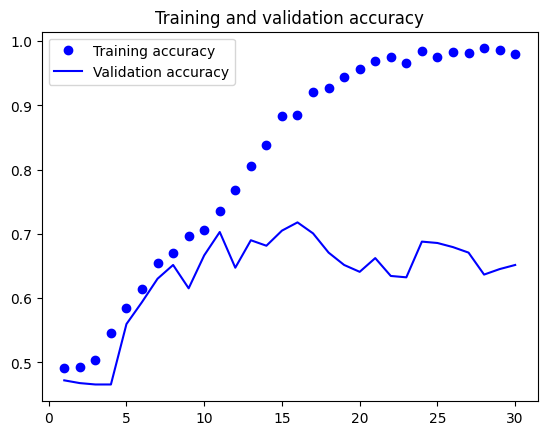

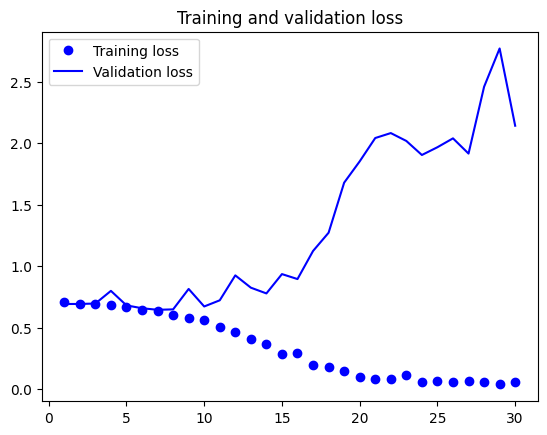

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.7082 - loss: 0.5894
Test accuracy: 0.614
Test loss: 0.664


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7347 - loss: 0.5633
Validation accuracy: 0.630
Validation loss: 0.646


**DATA AUGMENTATION**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

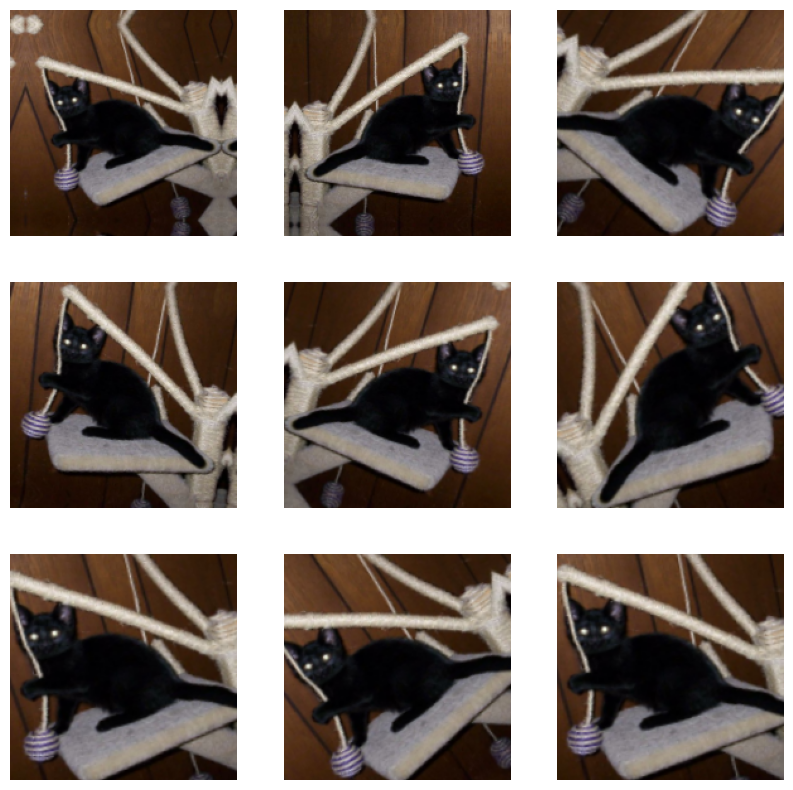

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)


Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.4796 - loss: 0.7020 - val_accuracy: 0.5662 - val_loss: 0.6920
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.4986 - loss: 0.6938 - val_accuracy: 0.4829 - val_loss: 0.6909
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.5345 - loss: 0.6903 - val_accuracy: 0.4872 - val_loss: 0.7629
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5669 - loss: 0.6886 - val_accuracy: 0.4936 - val_loss: 0.7337
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.5927 - loss: 0.6699 - val_accuracy: 0.4979 - val_loss: 0.9350
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6191 - loss: 0.6641 - val_accuracy: 0.4915 - val_loss: 0.7719
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6375 - loss: 0.6439 - val_accuracy: 0.5534 - val_loss: 0.7362
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6364 - loss: 0.6353 - val_accuracy: 0.5833 - v

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8391 - loss: 0.3879
Test accuracy: 0.796
Test loss: 0.484


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8291 - loss: 0.4215
Validation accuracy: 0.788
Validation loss: 0.545


# MODEL 3

In [ ]:
import os, shutil
from pathlib import Path

# 1) Source folders (already in Drive)
data_dir = Path("/content/drive/MyDrive/catsdogs_data/PetImages")
cats_dir = data_dir / "Cat"
dogs_dir = data_dir / "Dog"

# 2) Destination: model 3
base_dir = Path("/content/drive/MyDrive/catsdogs_data/model 3")

# Create folder tree
for subset in ("train", "validation", "test"):
    for category in ("cats", "dogs"):
        os.makedirs(base_dir / subset / category, exist_ok=True)

print("✅ Folder structure created under:", base_dir)

# 3) Helper copier
def copy_images(src_dir, dst_dir, start_idx, end_idx):
    fnames = [f"{i}.jpg" for i in range(start_idx, end_idx)]
    for fname in fnames:
        src = src_dir / fname
        dst = dst_dir / fname
        if src.exists():
            shutil.copyfile(src, dst)
        else:
            # silently skip missing/corrupt filenames
            pass

# 4) SPLIT (aiming for best performance)
# Train: 1,500 cats + 1,500 dogs  (total 3,000)
#   Use 0–499 (first 500) + 1000–1999 (next 1,000) => 1,500 per class
# Validation: unchanged (250+250) -> 500 total  (500–749)
# Test: unchanged (250+250) -> 500 total       (750–999)

# --- Training (cats) ---
copy_images(cats_dir, base_dir / "train" / "cats", 0, 500)
copy_images(cats_dir, base_dir / "train" / "cats", 1000, 2000)

# --- Training (dogs) ---
copy_images(dogs_dir, base_dir / "train" / "dogs", 0, 500)
copy_images(dogs_dir, base_dir / "train" / "dogs", 1000, 2000)

# --- Validation (unchanged) ---
copy_images(cats_dir, base_dir / "validation" / "cats", 500, 750)
copy_images(dogs_dir, base_dir / "validation" / "dogs", 500, 750)

# --- Test (unchanged) ---
copy_images(cats_dir, base_dir / "test" / "cats", 750, 1000)
copy_images(dogs_dir, base_dir / "test" / "dogs", 750, 1000)

print("✅ Finished creating 'model 3' dataset (train=3000, val=500, test=500)!")

# Optional: quick sanity check of directory tree
!find "/content/drive/MyDrive/catsdogs_data/model 3" -maxdepth 3 -type d -print


✅ Folder structure created under: /content/drive/MyDrive/catsdogs_data/model 3
✅ Finished creating 'model 3' dataset (train=3000, val=500, test=500)!
/content/drive/MyDrive/catsdogs_data/model 3
/content/drive/MyDrive/catsdogs_data/model 3/train
/content/drive/MyDrive/catsdogs_data/model 3/train/cats
/content/drive/MyDrive/catsdogs_data/model 3/train/dogs
/content/drive/MyDrive/catsdogs_data/model 3/validation
/content/drive/MyDrive/catsdogs_data/model 3/validation/cats
/content/drive/MyDrive/catsdogs_data/model 3/validation/dogs
/content/drive/MyDrive/catsdogs_data/model 3/test
/content/drive/MyDrive/catsdogs_data/model 3/test/cats
/content/drive/MyDrive/catsdogs_data/model 3/test/dogs


In [ ]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

BASE = "/content/drive/MyDrive/catsdogs_data/model 3"  # or model 2
IMG_SIZE = (180, 180); BATCH = 32; SEED = 123

train_dataset = image_dataset_from_directory(BASE + "/train", image_size=IMG_SIZE, batch_size=BATCH, shuffle=True, seed=SEED)
validation_dataset = image_dataset_from_directory(BASE + "/validation", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)
test_dataset = image_dataset_from_directory(BASE + "/test", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)

# skip any stragglers instead of crashing
try:
    train_dataset = train_dataset.ignore_errors()
    validation_dataset = validation_dataset.ignore_errors()
    test_dataset = test_dataset.ignore_errors()
except AttributeError:
    train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
    validation_dataset = validation_dataset.apply(tf.data.experimental.ignore_errors())
    test_dataset = test_dataset.apply(tf.data.experimental.ignore_errors())

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(AUTOTUNE)


Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    base_dir / "train", #change to train1, ...for train5 for diferent models
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
import os
from pathlib import Path

# folders we want to sanitize
folders_to_check = [
    "/content/drive/MyDrive/catsdogs_data/model 2/train/cats",
    "/content/drive/MyDrive/catsdogs_data/model 2/train/dogs",
    "/content/drive/MyDrive/catsdogs_data/model 2/validation/cats",
    "/content/drive/MyDrive/catsdogs_data/model 2/validation/dogs",
    "/content/drive/MyDrive/catsdogs_data/model 2/test/cats",
    "/content/drive/MyDrive/catsdogs_data/model 2/test/dogs",
]

def delete_zero_byte_images(folder):
    folder = Path(folder)
    removed = []
    if not folder.exists():
        print(f"⚠️ Folder missing: {folder}")
        return removed
    for f in folder.iterdir():
        if f.is_file():
            size_bytes = os.path.getsize(f)
            if size_bytes == 0:
                removed.append(str(f))
                f.unlink()  # delete the corrupt file
    return removed

all_removed = {}
for fd in folders_to_check:
    all_removed[fd] = delete_zero_byte_images(fd)

print("These files were deleted because they were empty/corrupt:")
for k, v in all_removed.items():
    if v:
        print(k, "->", v)


These files were deleted because they were empty/corrupt:


In [ ]:
import os
from pathlib import Path

folders_to_check = [
    "/content/drive/MyDrive/catsdogs_data/model 2/train/cats",
    "/content/drive/MyDrive/catsdogs_data/model 2/train/dogs",
    "/content/drive/MyDrive/catsdogs_data/model 2/validation/cats",
    "/content/drive/MyDrive/catsdogs_data/model 2/validation/dogs",
    "/content/drive/MyDrive/catsdogs_data/model 2/test/cats",
    "/content/drive/MyDrive/catsdogs_data/model 2/test/dogs",
]

def delete_zero_byte_images(folder):
    folder = Path(folder)
    removed = []
    if not folder.exists():
        print(f"⚠️ Folder missing: {folder}")
        return removed
    for f in folder.iterdir():
        if f.is_file() and os.path.getsize(f) == 0:
            removed.append(str(f))
            f.unlink()
    return removed

for fd in folders_to_check:
    deleted = delete_zero_byte_images(fd)
    if deleted:
        print("Deleted from", fd, ":", deleted)


In [ ]:
from pathlib import Path

def count_images(folder):
    folder = Path(folder)
    if not folder.exists():
        return 0
    return len([f for f in folder.iterdir() if f.suffix.lower() in [".jpg", ".jpeg", ".png"]])

for fd in folders_to_check:
    print(fd, "->", count_images(fd), "images")


/content/drive/MyDrive/catsdogs_data/model 2/train/cats -> 650 images
/content/drive/MyDrive/catsdogs_data/model 2/train/dogs -> 650 images
/content/drive/MyDrive/catsdogs_data/model 2/validation/cats -> 249 images
/content/drive/MyDrive/catsdogs_data/model 2/validation/dogs -> 250 images
/content/drive/MyDrive/catsdogs_data/model 2/test/cats -> 250 images
/content/drive/MyDrive/catsdogs_data/model 2/test/dogs -> 250 images


In [ ]:
import tensorflow as tf

train_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/catsdogs_data/model 2/train",
    labels="inferred",
    label_mode="binary",
    image_size=(180,180),
    batch_size=32,
    shuffle=True
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/catsdogs_data/model 2/validation",
    labels="inferred",
    label_mode="binary",
    image_size=(180,180),
    batch_size=32,
    shuffle=False
)

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)


Found 1300 files belonging to 2 classes.
Found 499 files belonging to 2 classes.


In [ ]:
import os, random, shutil
from pathlib import Path

### 1. SET YOUR PATHS ###

# Original full dataset (Kaggle PetImages)
orig_cats_dir = Path("/content/drive/MyDrive/catsdogs_data/PetImages/Cat")
orig_dogs_dir = Path("/content/drive/MyDrive/catsdogs_data/PetImages/Dog")

# Your split dataset (model 2)
train_cats_dir = Path("/content/drive/MyDrive/catsdogs_data/model 2/train/cats")
train_dogs_dir = Path("/content/drive/MyDrive/catsdogs_data/model 2/train/dogs")

val_cats_dir   = Path("/content/drive/MyDrive/catsdogs_data/model 2/validation/cats")
val_dogs_dir   = Path("/content/drive/MyDrive/catsdogs_data/model 2/validation/dogs")

test_cats_dir  = Path("/content/drive/MyDrive/catsdogs_data/model 2/test/cats")
test_dogs_dir  = Path("/content/drive/MyDrive/catsdogs_data/model 2/test/dogs")


### 2. COUNT HOW MANY WE HAVE IN VALIDATION RIGHT NOW ###

def count_images(folder: Path):
    if not folder.exists():
        return 0
    return sum(
        1
        for f in folder.iterdir()
        if f.is_file() and f.suffix.lower() in [".jpg", ".jpeg", ".png"]
    )

num_val_cats = count_images(val_cats_dir)
num_val_dogs = count_images(val_dogs_dir)

print("Before:")
print("validation/cats:", num_val_cats)
print("validation/dogs:", num_val_dogs)


### 3. DECIDE WHICH CLASS NEEDS THE EXTRA IMAGE ###

if num_val_cats < num_val_dogs:
    target_class = "cat"
    orig_dir = orig_cats_dir
    val_dir = val_cats_dir
    train_dir = train_cats_dir
    test_dir = test_cats_dir
else:
    target_class = "dog"
    orig_dir = orig_dogs_dir
    val_dir = val_dogs_dir
    train_dir = train_dogs_dir
    test_dir = test_dogs_dir

print("We'll add one", target_class, "to validation.")


### 4. BUILD A SET OF ALL FILENAMES ALREADY USED ANYWHERE (TRAIN / VAL / TEST FOR THAT CLASS) ###

def get_used_names(*folders):
    used = set()
    for folder in folders:
        if folder.exists():
            for f in folder.iterdir():
                if f.is_file() and f.suffix.lower() in [".jpg", ".jpeg", ".png"]:
                    used.add(f.name)
    return used

used_names = get_used_names(train_dir, val_dir, test_dir)


### 5. FIND CANDIDATE FILES FROM ORIGINAL DATA THAT AREN'T USED YET ###

candidates = [
    f for f in orig_dir.iterdir()
    if (
        f.is_file()
        and f.suffix.lower() in [".jpg", ".jpeg", ".png"]
        and f.name not in used_names
        and os.path.getsize(f) > 0  # skip corrupt 0-byte files
    )
]

if len(candidates) == 0:
    print("No unused", target_class, "images left to copy. 😭")
else:
    # pick one at random
    chosen = random.choice(candidates)
    dest_path = val_dir / chosen.name
    shutil.copy(chosen, dest_path)
    print("✅ Copied", chosen.name, "to", val_dir)


### 6. SHOW NEW COUNTS ###

num_val_cats_after = count_images(val_cats_dir)
num_val_dogs_after = count_images(val_dogs_dir)

print("After:")
print("validation/cats:", num_val_cats_after)
print("validation/dogs:", num_val_dogs_after)
print("total validation:", num_val_cats_after + num_val_dogs_after)


Before:
validation/cats: 249
validation/dogs: 250
We'll add one cat to validation.
✅ Copied 4071.jpg to /content/drive/MyDrive/catsdogs_data/model 2/validation/cats
After:
validation/cats: 250
validation/dogs: 250
total validation: 500


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 17s 278ms/step - accuracy: 0.5702 - loss: 0.6891 - val_accuracy: 0.5952 - val_loss: 0.6834
Epoch 2/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 165ms/step - accuracy: 0.5636 - loss: 0.6894 - val_accuracy: 0.5772 - val_loss: 0.6767
Epoch 3/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.6133 - loss: 0.6668 - val_accuracy: 0.5752 - val_loss: 0.6644
Epoch 4/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.6210 - loss: 0.6664 - val_accuracy: 0.5691 - val_loss: 0.6668
Epoch 5/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.6689 - loss: 0.6150 - val_accuracy: 0.6693 - val_loss: 0.6281
Epoch 6/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.6802 - loss: 0.5962 - val_accuracy: 0.6974 - val_loss: 0.6131
Epoch 7/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 177ms/step - accuracy: 0.6947 - loss: 0.5749 - val_accuracy: 0.6914 - val_loss: 0.6025
Epoch 8/30
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.7243 - loss: 0.5446 - val_accuracy: 0

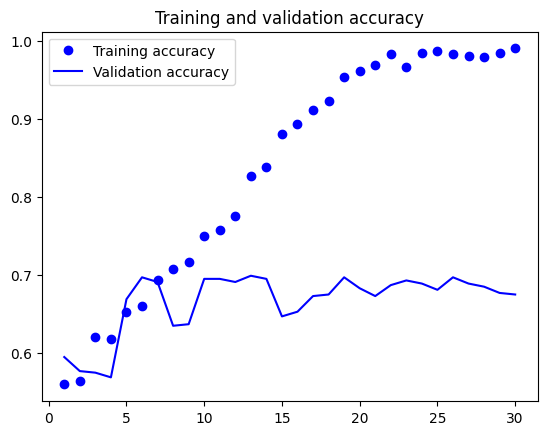

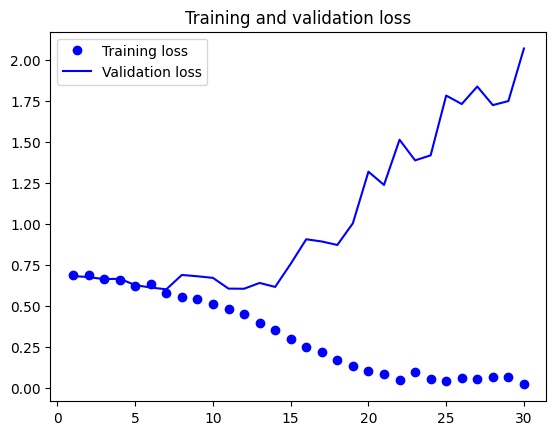

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.6474 - loss: 0.6055
Test accuracy: 0.638
Test loss: 0.616


In [ ]:
# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7105 - loss: 0.6030
Validation accuracy: 0.691
Validation loss: 0.602


**DATA AUGMENTATION**

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

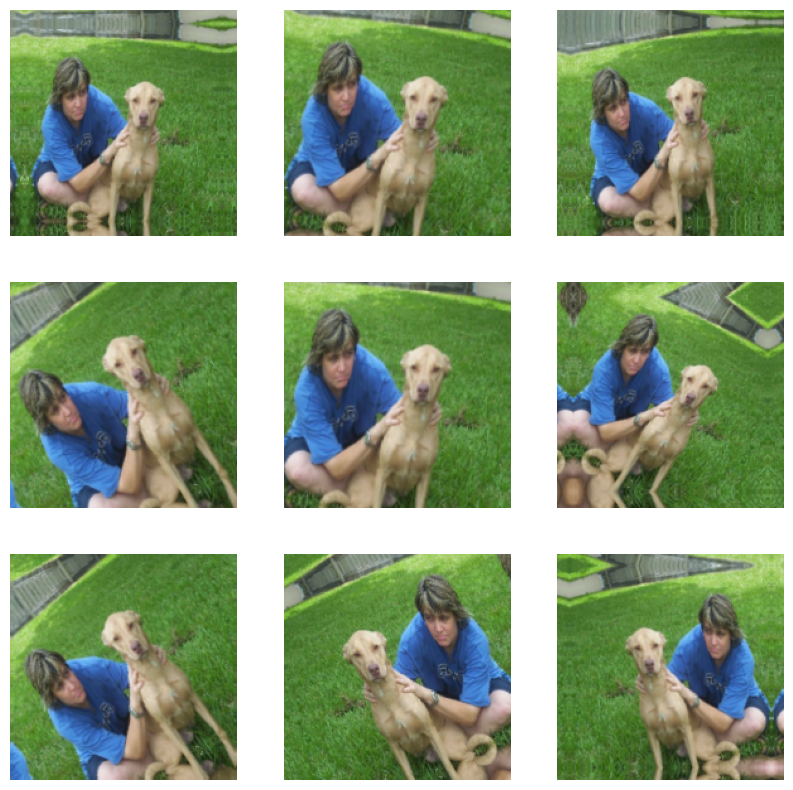

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 167ms/step - accuracy: 0.4889 - loss: 0.6989 - val_accuracy: 0.5010 - val_loss: 0.6927
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 175ms/step - accuracy: 0.5313 - loss: 0.6926 - val_accuracy: 0.5170 - val_loss: 0.6917
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.5456 - loss: 0.6911 - val_accuracy: 0.5190 - val_loss: 0.6891
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.5596 - loss: 0.6949 - val_accuracy: 0.6012 - val_loss: 0.6678
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 152ms/step - accuracy: 0.6055 - loss: 0.6536 - val_accuracy: 0.5411 - val_loss: 0.6932
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 176ms/step - accuracy: 0.6264 - loss: 0.6496 - val_accuracy: 0.5251 - val_loss: 0.8184
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 179ms/step - accuracy: 0.5923 - loss: 0.6595 - val_accuracy: 0.5451 - val_loss: 0.7075
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - accuracy: 0.6177 - loss: 0.6522 - val_accuracy: 0.

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")
print(f"Test loss: {test_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.7753 - loss: 0.5252
Test accuracy: 0.796
Test loss: 0.468


In [ ]:
# Load the model with data augmentation
test_model = keras.models.load_model("convnet_from_scratch_with_augmentation.keras")

# Evaluate on the validation dataset
val_loss, val_acc = test_model.evaluate(validation_dataset)

# Print the validation accuracy and loss
print(f"Validation accuracy: {val_acc:.3f}")
print(f"Validation loss: {val_loss:.3f}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 108ms/step - accuracy: 0.8465 - loss: 0.4255
Validation accuracy: 0.818
Validation loss: 0.463


Found 500 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


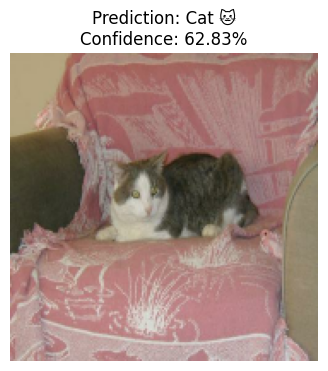

✅ True label: Cat 🐱


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# 1️⃣ Load the trained model (from scratch)
model = tf.keras.models.load_model("convnet_from_scratch.keras")

# 2️⃣ Recreate your test dataset (same structure and image size)
test_dir = "/content/drive/MyDrive/catsdogs_data/model 3/test"
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=(180, 180),
    batch_size=32,
    shuffle=False
)

# 3️⃣ Flatten (unbatch) the dataset so we can access single images
unbatched_test = test_dataset.unbatch()
all_images = list(unbatched_test.take(1000))  # limit to avoid memory overflow

# 4️⃣ Pick one random image
img_tensor, label_tensor = random.choice(all_images)
img = img_tensor.numpy().astype("uint8")
true_label = int(label_tensor.numpy())

# 5️⃣ Make a prediction
pred = model.predict(tf.expand_dims(img_tensor, axis=0))[0][0]
pred_label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"
confidence = pred if pred > 0.5 else 1 - pred

# 6️⃣ Display the image and prediction
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title(f"Prediction: {pred_label}\nConfidence: {confidence:.2%}")
plt.axis("off")
plt.show()

# 7️⃣ Print the true label for comparison
print("✅ True label:", "Dog 🐶" if true_label == 1 else "Cat 🐱")


## **QUESTION 4**

MODEL 1

Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/tmp/ipython-input-2829845010.py:52: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
32/32 - 16s - 487ms/step - accuracy: 0.7870 - loss: 0.4518 - val_accuracy: 0.9359 - val_loss: 0.1903
Epoch 2/10
32/32 - 2s - 55ms/step - accuracy: 0.9220 - loss: 0.1853 - val_accuracy: 0.9487 - val_loss: 0.1245
Epoch 3/10
32/32 - 3s - 79ms/step - accuracy: 0.9510 - loss: 0.1349 - val_accuracy: 0.9594 - val_loss: 0.1088
Epoch 4/10
32/32 - 2s - 53ms/step - accuracy: 0.9610 - loss: 0.1101 - val_accuracy: 0.9573 - val_loss: 0.1082
Epoch 5/10
32/32 - 2s - 51ms/step - accuracy: 0.9630 - loss: 0.1002 - val_accuracy: 0.9615 - val_loss: 0.1103
Epoch 6/10
32/32 - 2s - 53ms/step - accuracy: 0.9640 - loss: 0.0977 - val_accuracy: 0.9573 - val_loss: 0.1010
Epoch 7/10
32/32 - 2s - 54ms/step - accuracy: 0.9660 - loss: 0.0928 - val_accuracy: 0.9615 - val_loss: 0.0958
Epoch 8/10
32/32 - 2s - 51ms/step - accuracy: 0.9720 - loss: 0.0791 - val_accuracy: 0.9573 - val_loss: 0.0990
Epoch 9/10
32/32 - 2s - 51ms/step - accuracy: 0.9700 - loss: 0.0784 -

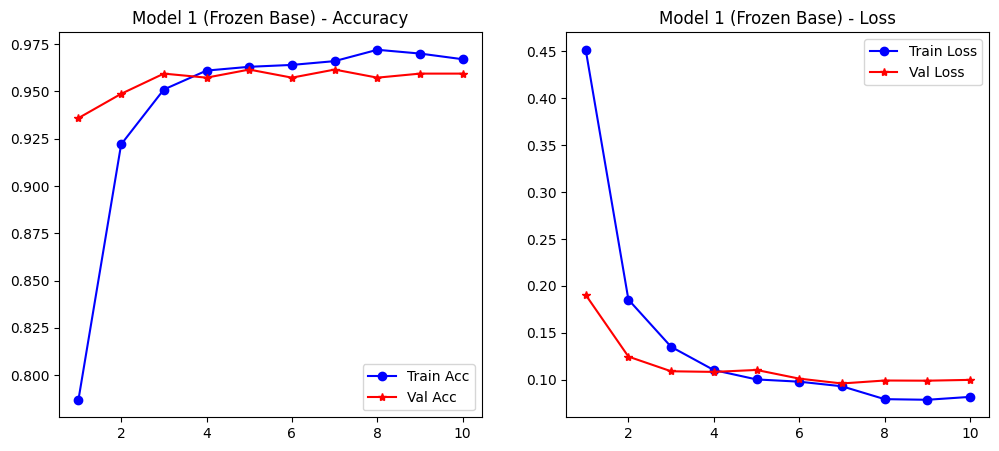

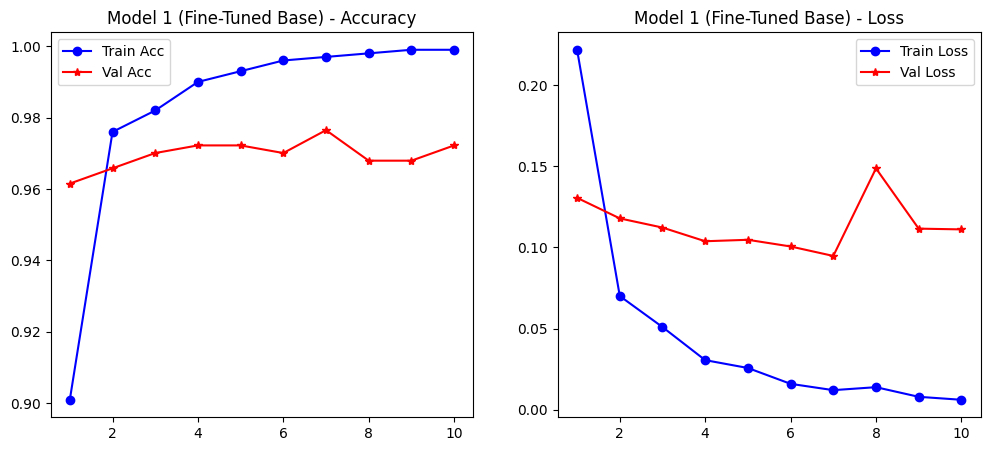

MODEL 1 — Test Accuracy: 0.9920


In [ ]:
# ==== TRANSFER LEARNING (MobileNetV2) on MODEL 1 ====
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1️⃣ DATASETS
# ---------------------------
BASE = "/content/drive/MyDrive/catsdogs_data/model 1"
IMG_SIZE = (180, 180)
BATCH = 32
SEED = 123

train_dataset = keras.utils.image_dataset_from_directory(
    BASE + "/train", image_size=IMG_SIZE, batch_size=BATCH, shuffle=True, seed=SEED)
validation_dataset = keras.utils.image_dataset_from_directory(
    BASE + "/validation", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)
test_dataset = keras.utils.image_dataset_from_directory(
    BASE + "/test", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)

try:
    train_dataset = train_dataset.ignore_errors()
    validation_dataset = validation_dataset.ignore_errors()
    test_dataset = test_dataset.ignore_errors()
except AttributeError:
    train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
    validation_dataset = validation_dataset.apply(tf.data.experimental.ignore_errors())
    test_dataset = test_dataset.apply(tf.data.experimental.ignore_errors())

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(AUTOTUNE)

# ---------------------------
# 2️⃣ DATA AUGMENTATION
# ---------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.08),
], name="data_augmentation")

# ---------------------------
# 3️⃣ BUILD MODEL FUNCTION
# ---------------------------
def build_transfer_model(img_size=(180,180), dropout=0.4, fine_tune_fraction=0.3):
    try:
        base = keras.applications.MobileNetV2(
            include_top=False, weights="imagenet", input_shape=img_size + (3,), name="mobilenetv2")
    except Exception:
        base = keras.applications.MobileNetV2(
            include_top=False, weights=None, input_shape=img_size + (3,), name="mobilenetv2")

    base.trainable = False
    inputs = keras.Input(shape=img_size + (3,))
    x = data_augmentation(inputs)
    x = keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    def unfreeze_top_fraction():
        total = len(base.layers)
        cutoff = int((1 - fine_tune_fraction) * total)
        for i, layer in enumerate(base.layers):
            layer.trainable = (i >= cutoff)
        model.compile(optimizer=keras.optimizers.Adam(1e-4),
                      loss="binary_crossentropy",
                      metrics=["accuracy"])
    return model, unfreeze_top_fraction

# ---------------------------
# 4️⃣ TRAIN (frozen + fine-tune)
# ---------------------------
model, unfreeze_fn = build_transfer_model(IMG_SIZE)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

history_frozen = model.fit(train_dataset, epochs=10,
                           validation_data=validation_dataset,
                           callbacks=callbacks, verbose=2)

unfreeze_fn()
history_ft = model.fit(train_dataset, epochs=10,
                       validation_data=validation_dataset,
                       callbacks=callbacks, verbose=2)

# ---------------------------
# 5️⃣ PLOTS
# ---------------------------
def plot_history(history, title):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'bo-', label='Train Acc')
    plt.plot(epochs, val_acc, 'r*-', label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'bo-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

plot_history(history_frozen, "Model 1 (Frozen Base)")
plot_history(history_ft, "Model 1 (Fine-Tuned Base)")

# ---------------------------
# 6️⃣ TEST EVAL + IMAGE PREDICTION
# ---------------------------
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"MODEL 1 — Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


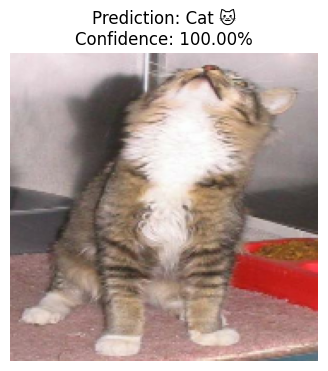

✅ True Label: Cat 🐱


In [ ]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

# Get a random image from the test set
all_images = list(test_dataset.unbatch().take(2000))  # flatten test batches (limit to avoid memory issue)
rand_index = random.randint(0, len(all_images) - 1)
img, label = all_images[rand_index]
img = img.numpy().astype("uint8")
true_label = label.numpy()

# Predict
pred = model.predict(tf.expand_dims(img, 0))[0][0]
pred_label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"
conf = pred if pred > 0.5 else 1 - pred

# Plot
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title(f"Prediction: {pred_label}\nConfidence: {conf:.2%}")
plt.axis("off")
plt.show()

print("✅ True Label:", "Dog 🐶" if true_label == 1 else "Cat 🐱")


In [ ]:
# ================================
# 📊 FINAL EVALUATION METRICS
# ================================

# Get last epoch metrics for validation (from fine-tuned training)
val_acc = history_ft.history["val_accuracy"][-1]
val_loss = history_ft.history["val_loss"][-1]

# Evaluate on test dataset
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)

print("✅ FINAL RESULTS FOR MODEL 1 (Transfer Learning)")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss:     {val_loss:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")
print(f"Test Loss:           {test_loss:.4f}")


✅ FINAL RESULTS FOR MODEL 1 (Transfer Learning)
Validation Accuracy: 0.9722
Validation Loss:     0.1111
Test Accuracy:       0.9920
Test Loss:           0.0321


Found 1300 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/tmp/ipython-input-2064610650.py:52: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = keras.applications.MobileNetV2(


Epoch 1/10
41/41 - 15s - 369ms/step - accuracy: 0.8423 - loss: 0.3440 - val_accuracy: 0.9480 - val_loss: 0.1307
Epoch 2/10
41/41 - 2s - 51ms/step - accuracy: 0.9477 - loss: 0.1487 - val_accuracy: 0.9560 - val_loss: 0.1054
Epoch 3/10
41/41 - 2s - 53ms/step - accuracy: 0.9538 - loss: 0.1179 - val_accuracy: 0.9560 - val_loss: 0.1019
Epoch 4/10
41/41 - 2s - 52ms/step - accuracy: 0.9631 - loss: 0.1028 - val_accuracy: 0.9640 - val_loss: 0.0864
Epoch 5/10
41/41 - 2s - 50ms/step - accuracy: 0.9685 - loss: 0.0747 - val_accuracy: 0.9680 - val_loss: 0.0797
Epoch 6/10
41/41 - 2s - 48ms/step - accuracy: 0.9769 - loss: 0.0695 - val_accuracy: 0.9640 - val_loss: 0.0811
Epoch 7/10
41/41 - 2s - 50ms/step - accuracy: 0.9708 - loss: 0.0806 - val_accuracy: 0.9640 - val_loss: 0.0782
Epoch 8/10
41/41 - 2s - 53ms/step - accuracy: 0.9777 - loss: 0.0649 - val_accuracy: 0.9640 - val_loss: 0.0804
Epoch 9/10
41/41 - 2s - 53ms/step - accuracy: 0.9762 - loss: 0.0614 - val_accuracy: 0.9640 - val_loss: 0.0822
Epoch 10

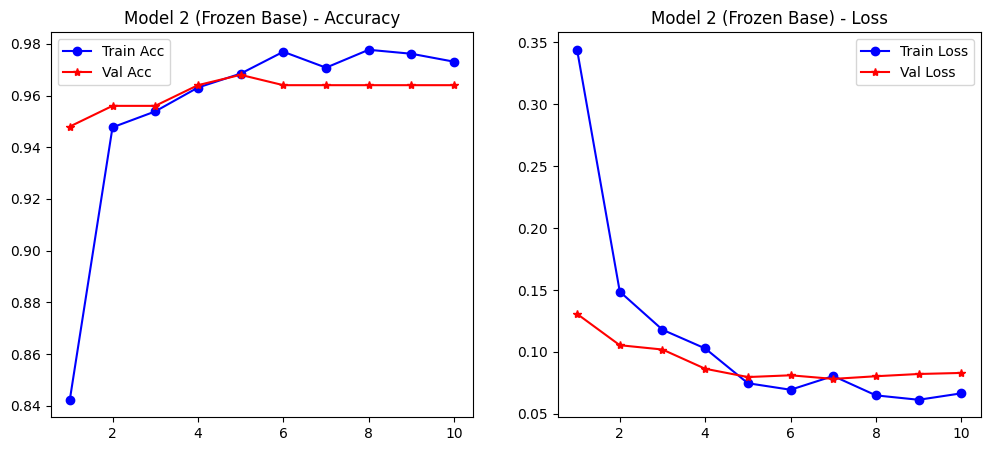

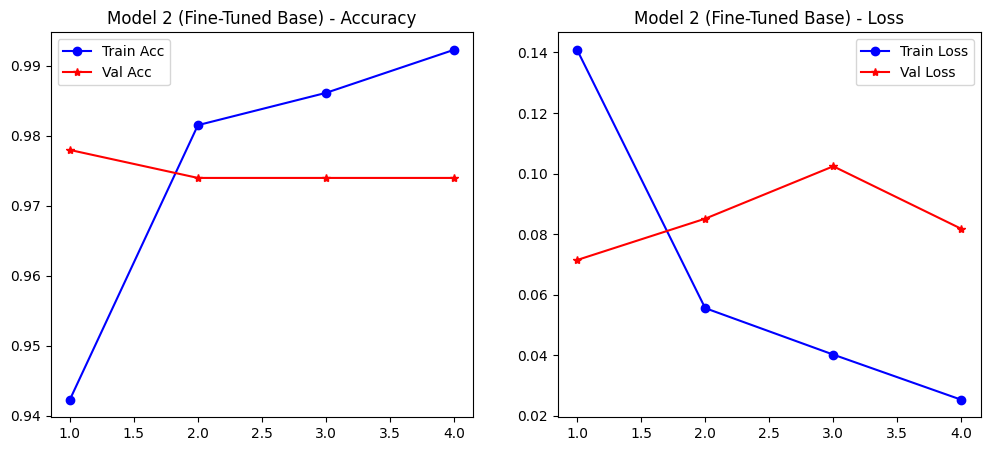

MODEL 2 — Test Accuracy: 0.9860


In [ ]:
# ==== TRANSFER LEARNING (MobileNetV2) on MODEL 2 ====
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# 1️⃣ DATASETS
# ---------------------------
BASE = "/content/drive/MyDrive/catsdogs_data/model 2"
IMG_SIZE = (180, 180)
BATCH = 32
SEED = 123

train_dataset = keras.utils.image_dataset_from_directory(
    BASE + "/train", image_size=IMG_SIZE, batch_size=BATCH, shuffle=True, seed=SEED)
validation_dataset = keras.utils.image_dataset_from_directory(
    BASE + "/validation", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)
test_dataset = keras.utils.image_dataset_from_directory(
    BASE + "/test", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)

try:
    train_dataset = train_dataset.ignore_errors()
    validation_dataset = validation_dataset.ignore_errors()
    test_dataset = test_dataset.ignore_errors()
except AttributeError:
    train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
    validation_dataset = validation_dataset.apply(tf.data.experimental.ignore_errors())
    test_dataset = test_dataset.apply(tf.data.experimental.ignore_errors())

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(AUTOTUNE)

# ---------------------------
# 2️⃣ DATA AUGMENTATION
# ---------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.08),
], name="data_augmentation")

# ---------------------------
# 3️⃣ BUILD MODEL FUNCTION
# ---------------------------
def build_transfer_model(img_size=(180,180), dropout=0.35, fine_tune_fraction=0.2):
    try:
        base = keras.applications.MobileNetV2(
            include_top=False, weights="imagenet", input_shape=img_size + (3,), name="mobilenetv2")
    except Exception:
        base = keras.applications.MobileNetV2(
            include_top=False, weights=None, input_shape=img_size + (3,), name="mobilenetv2")

    base.trainable = False
    inputs = keras.Input(shape=img_size + (3,))
    x = data_augmentation(inputs)
    x = keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)
    model = keras.Model(inputs, outputs)

    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    def unfreeze_top_fraction():
        total = len(base.layers)
        cutoff = int((1 - fine_tune_fraction) * total)
        for i, layer in enumerate(base.layers):
            layer.trainable = (i >= cutoff)
        model.compile(optimizer=keras.optimizers.Adam(1e-4),
                      loss="binary_crossentropy",
                      metrics=["accuracy"])
    return model, unfreeze_top_fraction

# ---------------------------
# 4️⃣ TRAIN (frozen + fine-tune)
# ---------------------------
model, unfreeze_fn = build_transfer_model(IMG_SIZE)

callbacks = [
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

history_frozen = model.fit(train_dataset, epochs=10,
                           validation_data=validation_dataset,
                           callbacks=callbacks, verbose=2)

unfreeze_fn()
history_ft = model.fit(train_dataset, epochs=10,
                       validation_data=validation_dataset,
                       callbacks=callbacks, verbose=2)

# ---------------------------
# 5️⃣ PLOTS
# ---------------------------
def plot_history(history, title):
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(acc)+1)

    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, acc, 'bo-', label='Train Acc')
    plt.plot(epochs, val_acc, 'r*-', label='Val Acc')
    plt.title(f'{title} - Accuracy')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, loss, 'bo-', label='Train Loss')
    plt.plot(epochs, val_loss, 'r*-', label='Val Loss')
    plt.title(f'{title} - Loss')
    plt.legend()
    plt.show()

plot_history(history_frozen, "Model 2 (Frozen Base)")
plot_history(history_ft, "Model 2 (Fine-Tuned Base)")

# ---------------------------
# 6️⃣ TEST EVAL + IMAGE PREDICTION
# ---------------------------
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"MODEL 2 — Test Accuracy: {test_acc:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


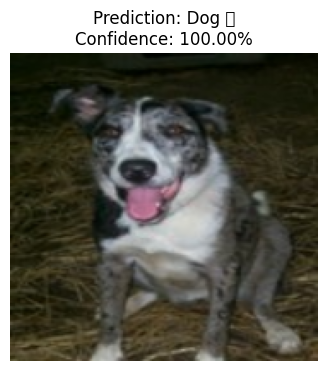

✅ True Label: Dog 🐶


In [ ]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt

# Unbatch test dataset (flatten batches)
all_images = list(test_dataset.unbatch().take(2000))  # limit to avoid memory issues

# Pick a random image
rand_index = random.randint(0, len(all_images) - 1)
img, label = all_images[rand_index]
img = img.numpy().astype("uint8")
true_label = label.numpy()

# Predict
pred = model.predict(tf.expand_dims(img, 0))[0][0]
pred_label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"
conf = pred if pred > 0.5 else 1 - pred

# Display
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.title(f"Prediction: {pred_label}\nConfidence: {conf:.2%}")
plt.axis("off")
plt.show()

print("✅ True Label:", "Dog 🐶" if true_label == 1 else "Cat 🐱")



In [ ]:
# ================================
# 📊 FINAL EVALUATION METRICS (MODEL 2)
# ================================

# Get validation metrics from last fine-tuning epoch
val_acc = history_ft.history["val_accuracy"][-1]
val_loss = history_ft.history["val_loss"][-1]

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)

print("✅ FINAL RESULTS FOR MODEL 2 (Transfer Learning)")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss:     {val_loss:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")
print(f"Test Loss:           {test_loss:.4f}")


✅ FINAL RESULTS FOR MODEL 2 (Transfer Learning)
Validation Accuracy: 0.9740
Validation Loss:     0.0817
Test Accuracy:       0.9860
Test Loss:           0.0392


In [ ]:
# ==== TRANSFER LEARNING (MobileNetV2) on MODEL 3 ====
# One single block: datasets + augmentation + model build + frozen + fine-tune + test eval

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

# ---------------------------
# 1) DATASETS (MODEL 3)
# ---------------------------
BASE = "/content/drive/MyDrive/catsdogs_data/model 3"   # you already created this
IMG_SIZE = (180, 180)
BATCH = 32
SEED = 123

train_dataset = image_dataset_from_directory(
    BASE + "/train", image_size=IMG_SIZE, batch_size=BATCH, shuffle=True, seed=SEED)
validation_dataset = image_dataset_from_directory(
    BASE + "/validation", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)
test_dataset = image_dataset_from_directory(
    BASE + "/test", image_size=IMG_SIZE, batch_size=BATCH, shuffle=False)

# Skip corrupted files if any
try:
    train_dataset = train_dataset.ignore_errors()
    validation_dataset = validation_dataset.ignore_errors()
    test_dataset = test_dataset.ignore_errors()
except AttributeError:
    train_dataset = train_dataset.apply(tf.data.experimental.ignore_errors())
    validation_dataset = validation_dataset.apply(tf.data.experimental.ignore_errors())
    test_dataset = test_dataset.apply(tf.data.experimental.ignore_errors())

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().prefetch(AUTOTUNE)
validation_dataset = validation_dataset.cache().prefetch(AUTOTUNE)
test_dataset = test_dataset.cache().prefetch(AUTOTUNE)

# ---------------------------
# 2) DATA AUGMENTATION
# ---------------------------
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.08),
], name="data_augmentation")

# ---------------------------
# 3) BUILD TRANSFER MODEL (MobileNetV2)
# ---------------------------
def build_transfer_model(img_size=(180,180), dropout=0.35, fine_tune_fraction=0.2):
    # Load pretrained MobileNetV2 weights; fallback to random if network blocked
    try:
        base = keras.applications.MobileNetV2(
            include_top=False, weights="imagenet", input_shape=img_size + (3,), name="mobilenetv2")
    except Exception:
        base = keras.applications.MobileNetV2(
            include_top=False, weights=None, input_shape=img_size + (3,), name="mobilenetv2")

    base.trainable = False  # frozen base (Phase 1)

    inputs = keras.Input(shape=img_size + (3,))
    x = data_augmentation(inputs)
    x = keras.applications.mobilenet_v2.preprocess_input(x)
    x = base(x, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs, outputs, name="transfer_mobilenetv2")

    # compile for frozen phase
    model.compile(optimizer=keras.optimizers.Adam(1e-3),
                  loss="binary_crossentropy",
                  metrics=["accuracy"])

    # Define helper function (same indentation level as compile)
    def unfreeze_top_fraction():
        total = len(base.layers)
        cutoff = int((1 - fine_tune_fraction) * total)
        for i, layer in enumerate(base.layers):
            layer.trainable = (i >= cutoff)
        model.compile(optimizer=keras.optimizers.Adam(1e-4),  # lower LR for fine-tuning
                      loss="binary_crossentropy",
                      metrics=["accuracy"])

    return model, unfreeze_top_fraction


# ---------------------------
# 4) TRAIN PHASE 1 (frozen)
# ---------------------------
model, unfreeze_fn = build_transfer_model(IMG_SIZE)

callbacks_frozen = [
    keras.callbacks.ModelCheckpoint("transfer_model3_frozen.keras", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

history_frozen = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks_frozen,
    verbose=2
)

# ---------------------------
# 5) TRAIN PHASE 2 (fine-tune top layers)
# ---------------------------
unfreeze_fn()  # unfreeze top layers

callbacks_ft = [
    keras.callbacks.ModelCheckpoint("transfer_model3_finetuned.keras", save_best_only=True, monitor="val_loss"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
]

history_ft = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks_ft,
    verbose=2
)

# ---------------------------
# 6) TEST EVALUATION
# ---------------------------
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)
print(f"MODEL 3 — Transfer (MobileNetV2, fine-tuned) | Test Accuracy: {test_acc:.4f} | Test Loss: {test_loss:.4f}")


Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


/tmp/ipython-input-1698903525.py:55: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base = keras.applications.MobileNetV2(


Epoch 1/10
94/94 - 30s - 315ms/step - accuracy: 0.8977 - loss: 0.2399 - val_accuracy: 0.9594 - val_loss: 0.1011
Epoch 2/10
94/94 - 22s - 229ms/step - accuracy: 0.9540 - loss: 0.1177 - val_accuracy: 0.9637 - val_loss: 0.0902
Epoch 3/10
94/94 - 5s - 50ms/step - accuracy: 0.9603 - loss: 0.1085 - val_accuracy: 0.9658 - val_loss: 0.0874
Epoch 4/10
94/94 - 4s - 46ms/step - accuracy: 0.9653 - loss: 0.0906 - val_accuracy: 0.9679 - val_loss: 0.0783
Epoch 5/10
94/94 - 4s - 41ms/step - accuracy: 0.9700 - loss: 0.0827 - val_accuracy: 0.9658 - val_loss: 0.0836
Epoch 6/10
94/94 - 4s - 43ms/step - accuracy: 0.9723 - loss: 0.0722 - val_accuracy: 0.9615 - val_loss: 0.0847
Epoch 7/10
94/94 - 4s - 42ms/step - accuracy: 0.9797 - loss: 0.0575 - val_accuracy: 0.9637 - val_loss: 0.0813
Epoch 1/10
94/94 - 16s - 175ms/step - accuracy: 0.9490 - loss: 0.1264 - val_accuracy: 0.9808 - val_loss: 0.0985
Epoch 2/10
94/94 - 5s - 55ms/step - accuracy: 0.9740 - loss: 0.0686 - val_accuracy: 0.9765 - val_loss: 0.1168
Epoc

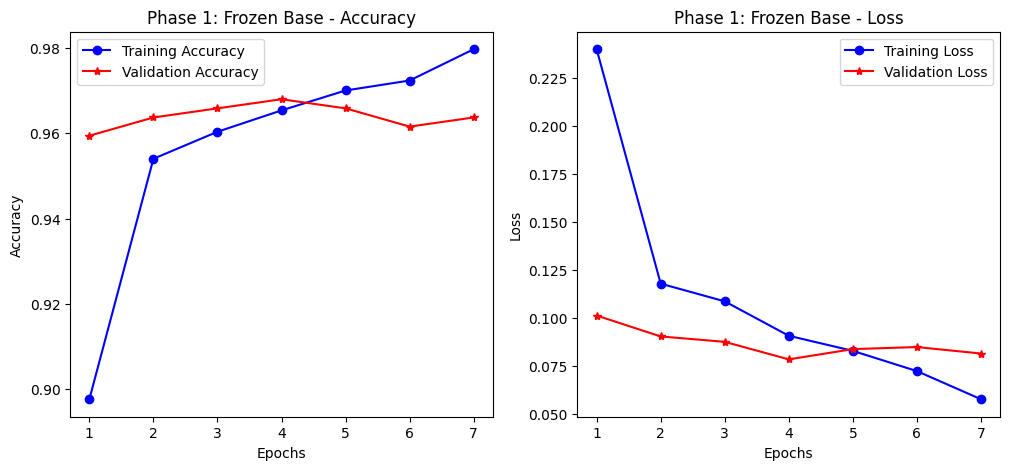

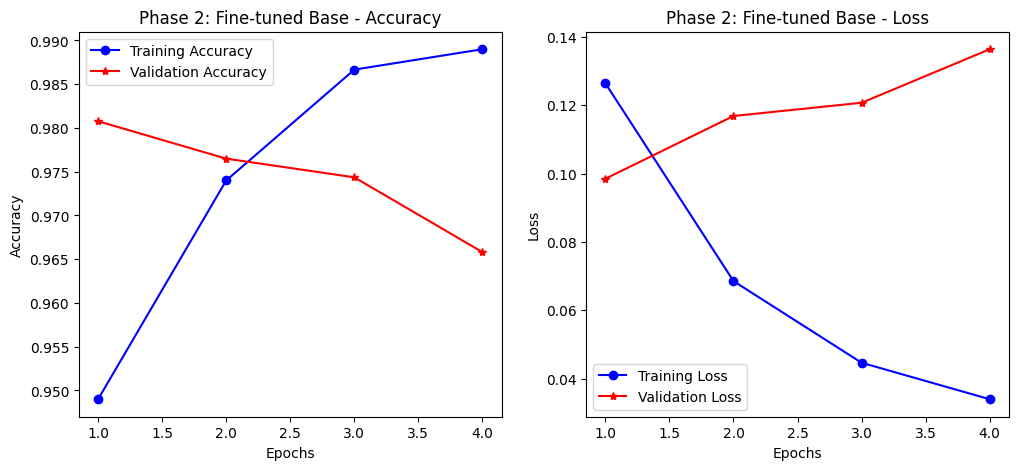

In [ ]:
def plot_history(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, "bo-", label="Training Accuracy")
    plt.plot(epochs, val_acc, "r*-", label="Validation Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, "bo-", label="Training Loss")
    plt.plot(epochs, val_loss, "r*-", label="Validation Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Plot both phases
plot_history(history_frozen, "Phase 1: Frozen Base")
plot_history(history_ft, "Phase 2: Fine-tuned Base")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


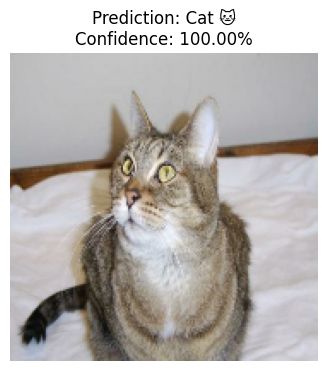

✅ True Label: Cat 🐱


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# -------------------------------------
# 🧩 Select one batch from the test dataset
# -------------------------------------
for images, labels in test_dataset.take(1):
    sample_image = images[0].numpy().astype("uint8")
    true_label = labels[0].numpy()
    break  # Take only the first image

# -------------------------------------
# 🧠 Make prediction
# -------------------------------------
pred = model.predict(tf.expand_dims(sample_image, axis=0))[0][0]
pred_label = "Dog 🐶" if pred > 0.5 else "Cat 🐱"
confidence = pred if pred > 0.5 else 1 - pred

# -------------------------------------
# 🖼️ Display the image with prediction
# -------------------------------------
plt.figure(figsize=(4,4))
plt.imshow(sample_image)
plt.title(f"Prediction: {pred_label}\nConfidence: {confidence:.2%}")
plt.axis("off")
plt.show()

# Also print the true label
print("✅ True Label:", "Dog 🐶" if true_label == 1 else "Cat 🐱")


In [ ]:
# ================================
# 📊 FINAL EVALUATION METRICS (MODEL 3)
# ================================

# Get validation metrics from the final fine-tuning phase
val_acc = history_ft.history["val_accuracy"][-1]
val_loss = history_ft.history["val_loss"][-1]

# Evaluate on test dataset (already done above, but keeping for clarity)
test_loss, test_acc = model.evaluate(test_dataset, verbose=0)

print("\n✅ FINAL RESULTS FOR MODEL 3 (Transfer Learning)")
print(f"Validation Accuracy: {val_acc:.4f}")
print(f"Validation Loss:     {val_loss:.4f}")
print(f"Test Accuracy:       {test_acc:.4f}")
print(f"Test Loss:           {test_loss:.4f}")



✅ FINAL RESULTS FOR MODEL 3 (Transfer Learning)
Validation Accuracy: 0.9658
Validation Loss:     0.1364
Test Accuracy:       0.9880
Test Loss:           0.0397
